# Project 4: Software Architecture + ML Evaluation

-------

## Part 1: Importing Test Dataset and Model

### Import Needed Libraries:

In [1]:
pip install scikit-learn==1.2.1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import joblib
import warnings

import matplotlib.pyplot as plt

%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing Our Test Data into a DataFrame...

In [3]:
test_df = pd.read_csv('student_data.csv')
test_df.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


### Importing Our Model...

In [4]:
# import the regular model
model = pickle.load(open('model.pkl','rb'))

In [5]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encode',
                                                  OneHotEncoder(), [1, 3])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        n_estimators=1000))])


-----

## Part 2: Plotting Distributions for All Features

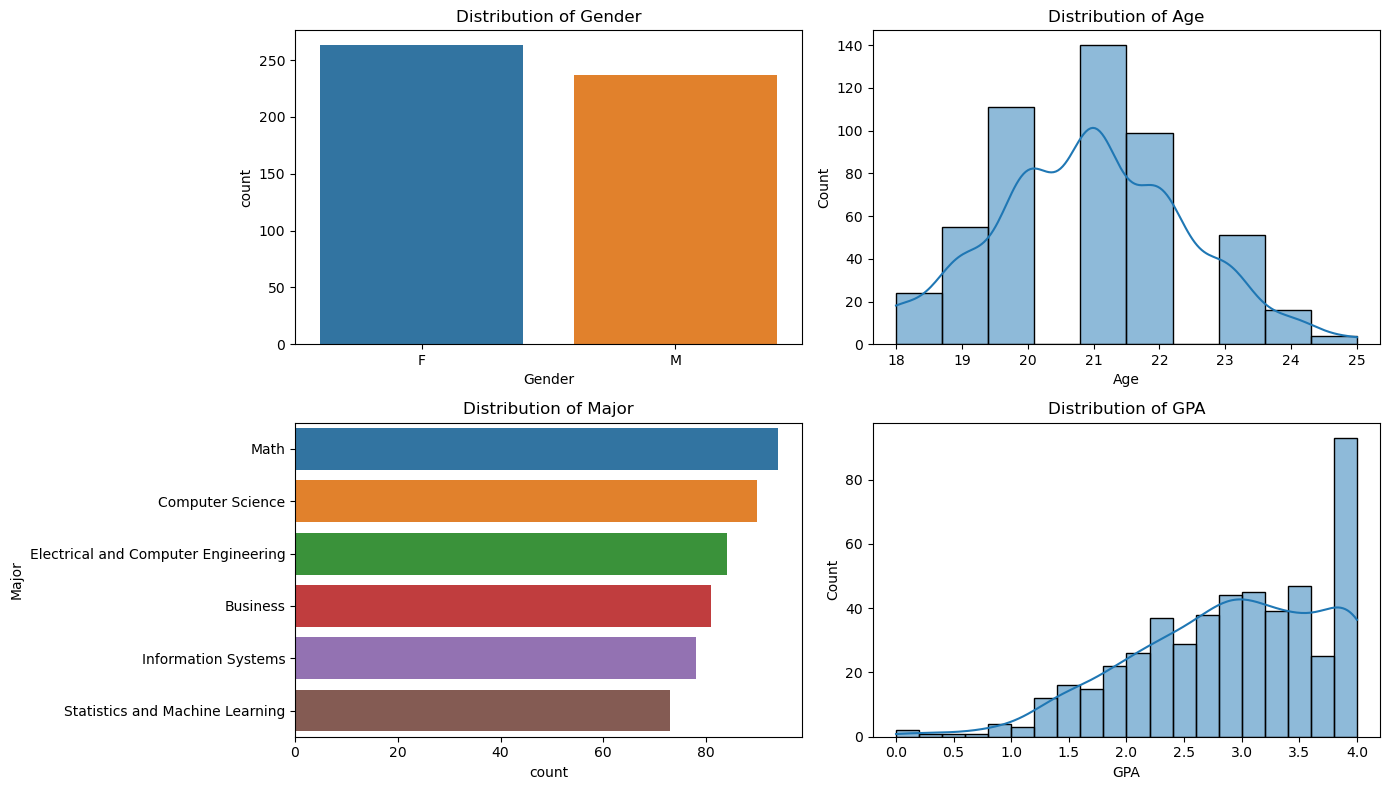

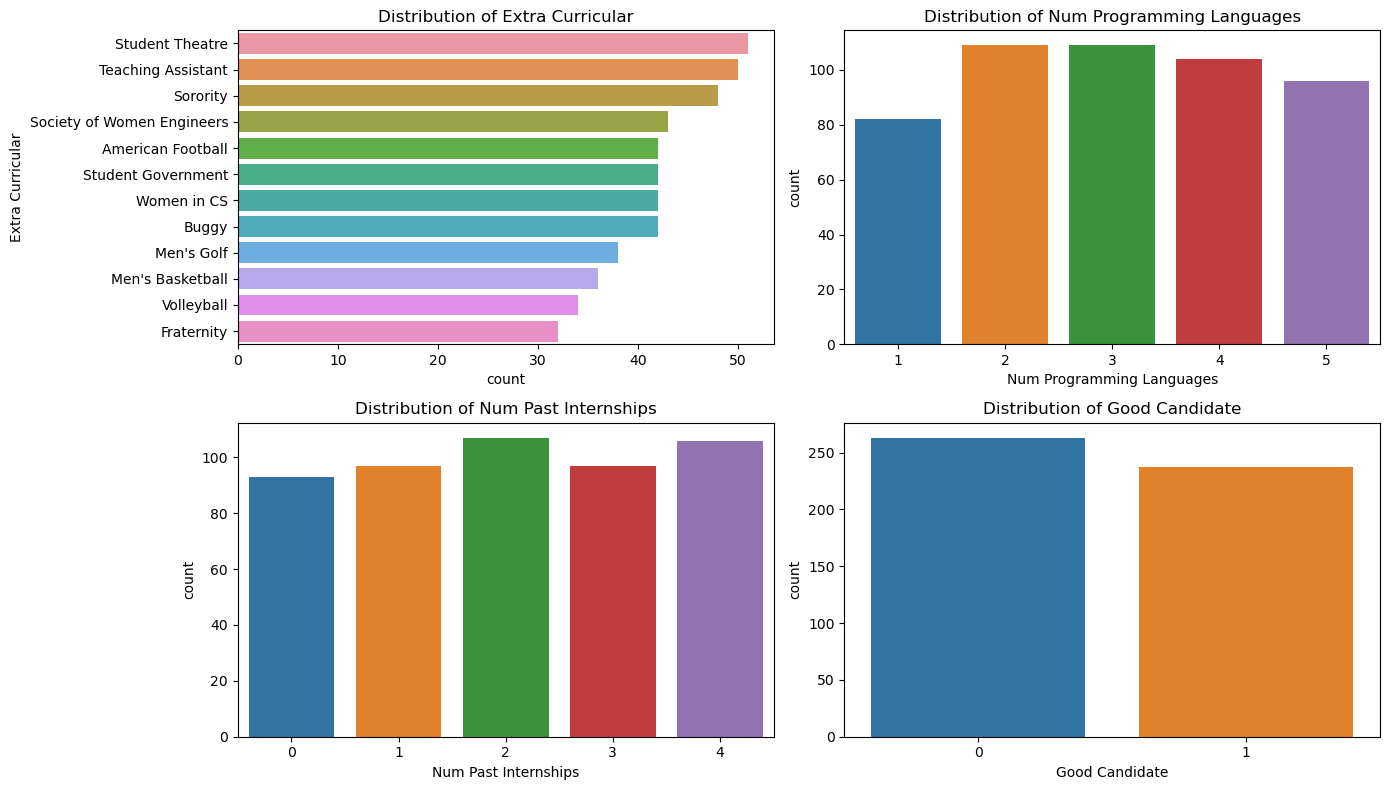

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Setting a larger figure size for all plots
plt.figure(figsize=(14, 8))

# Define the layout for 2 rows and 2 columns
num_rows, num_cols = 2, 2

# Feature 1: Gender - Create a count plot
plt.subplot(num_rows, num_cols, 1)
sns.countplot(data=test_df, x='Gender')
plt.title('Distribution of Gender')

# Feature 2: Age - Create a histogram
plt.subplot(num_rows, num_cols, 2)
sns.histplot(data=test_df, x='Age', bins=10, kde=True)
plt.title('Distribution of Age')

# Feature 3: Major - Create a horizontal bar plot
plt.subplot(num_rows, num_cols, 3)
sns.countplot(data=test_df, y='Major', order=test_df['Major'].value_counts().index)
plt.title('Distribution of Major')

# Feature 4: GPA - Create a histogram
plt.subplot(num_rows, num_cols, 4)
sns.histplot(data=test_df, x='GPA', bins=20, kde=True)
plt.title('Distribution of GPA')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Additional Features:

# Set a larger figure size for the next set of plots
plt.figure(figsize=(14, 8))

# Define the layout with 2 rows and 2 columns for the additional features
num_rows, num_cols = 2, 2

# Feature 5: Extra Curricular - Create a horizontal bar plot
plt.subplot(num_rows, num_cols, 1)
sns.countplot(data=test_df, y='Extra Curricular', order=test_df['Extra Curricular'].value_counts().index)
plt.title('Distribution of Extra Curricular')

# Feature 6: Num Programming Languages - Create a count plot
plt.subplot(num_rows, num_cols, 2)
sns.countplot(data=test_df, x='Num Programming Languages')
plt.title('Distribution of Num Programming Languages')

# Feature 7: Num Past Internships - Create a count plot
plt.subplot(num_rows, num_cols, 3)
sns.countplot(data=test_df, x='Num Past Internships')
plt.title('Distribution of Num Past Internships')

# Feature 8: Good Candidate - Create a count plot
plt.subplot(num_rows, num_cols, 4)
sns.countplot(data=test_df, x='Good Candidate')
plt.title('Distribution of Good Candidate')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


-----

## Part 3: Predicting the Output of the Test Dataset Using the Model

In [7]:
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encode',
                                                  OneHotEncoder(), [1, 3])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        n_estimators=1000))])


In [8]:
# Split the data into inputs and labels
X_test = test_df.drop(['Good Candidate'], axis=1)
y_test = test_df['Good Candidate']

In [9]:
# Use the model to predict labels for the test data
y_pred = model.predict(X_test)

---

## Part 4: Report the accuracy of the model, and the confusion matrix

### The accuracy of the model:

In [10]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score for model:', accuracy)

Accuracy Score for model: 0.832


### The Confusion Matrix of The Model:

In [11]:
# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[221  42]
 [ 42 195]]


In [12]:
# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print('True Negative (TN):', confusion[0, 0])
print('False Positive (FP):', confusion[0, 1])
print('False Negative (FN):', confusion[1, 0])
print('True Positive (TP):', confusion[1, 1])
print("----------------")
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
True Negative (TN): 221
False Positive (FP): 42
False Negative (FN): 42
True Positive (TP): 195
----------------
Confusion Matrix:
[[221  42]
 [ 42 195]]


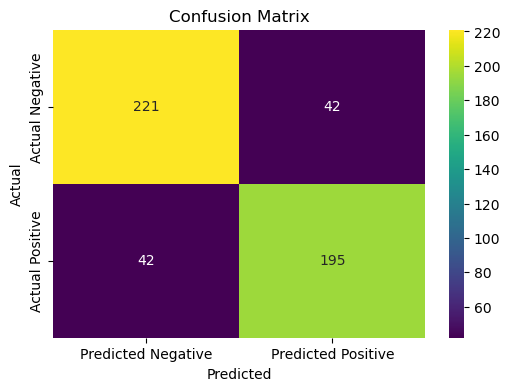

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap with a different color palette (e.g., "viridis")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt="d", cmap="viridis", 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

-----